In [231]:
!pip list
# check if packages are installed

Package                   Version
------------------------- -----------
appnope                   0.1.4
asttokens                 3.0.0
attrs                     25.3.0
beautifulsoup4            4.13.4
certifi                   2025.4.26
charset-normalizer        3.4.1
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
executing                 2.2.0
fastjsonschema            2.21.1
fonttools                 4.57.0
frozendict                2.4.6
idna                      3.10
ipykernel                 6.29.5
ipython                   9.2.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.3
jupyter_core              5.7.2
kiwisolver                1.4.8
lxml                      5.4.0
matplotlib                3.10.1
matplotlib-inline         0.1.7
multitasking    

In [232]:
# import packages
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [233]:
# establish start times and end times
start = dt.datetime(2022, 12, 30)
end = dt.datetime(2025, 3, 15)
start, end

(datetime.datetime(2022, 12, 30, 0, 0), datetime.datetime(2025, 3, 15, 0, 0))

In [234]:
#etf's being downloaded
etf_list = ['QQQ', 'SMH', 'SPY']
etf_list

['QQQ', 'SMH', 'SPY']

In [235]:
#etf's being downloaded along with closing prices
df = yf.download(etf_list, start=start, end=end)
data = df.Close
data.head().dropna()

[*********************100%***********************]  3 of 3 completed


Ticker,QQQ,SMH,SPY
Date,,,
2022-12-30,262.499115,100.416969,370.818237
2023-01-03,260.724670,99.645065,369.257111
2023-01-04,261.966766,102.178497,372.107788
2023-01-05,257.865845,100.347702,367.860840
2023-01-06,264.983307,104.736671,376.296600


In [236]:
#calculate daily returns
returns = data.pct_change().dropna()
returns.count()

Ticker
QQQ    551
SMH    551
SPY    551
dtype: int64

In [237]:
#calculate daily return differences
diff = returns['QQQ'] - returns['SMH']
diff.dropna().head()

Date
2023-01-03    0.000927
2023-01-04   -0.020661
2023-01-05    0.002263
2023-01-06   -0.016136
2023-01-09   -0.015306
dtype: float64

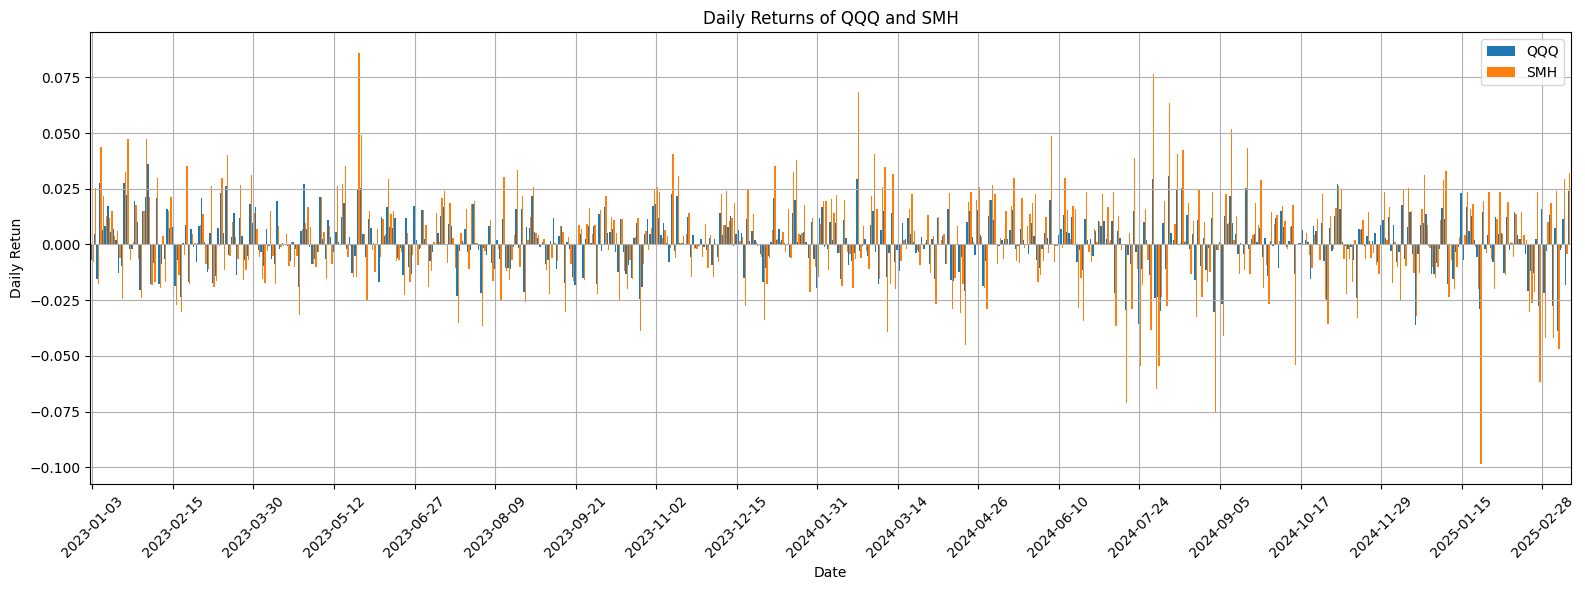

In [238]:
# plot daily returns of QQQ and SMH
ax = returns[['QQQ', 'SMH']].plot(kind='bar', figsize=(16,6), width = 1)

#improve readability of x-axis
ax.set_title('Daily Returns of QQQ and SMH')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Retun')
ax.legend()
ax.grid(True)

# show only one x-tick every 30 days
tick_spacing = 30
tick_locs = list(range(0, len(returns), tick_spacing))
tick_labels = [returns.index[i].strftime('%Y-%m-%d') for i in tick_locs]
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labels, rotation=45)

# display
plt.tight_layout()
plt.show()

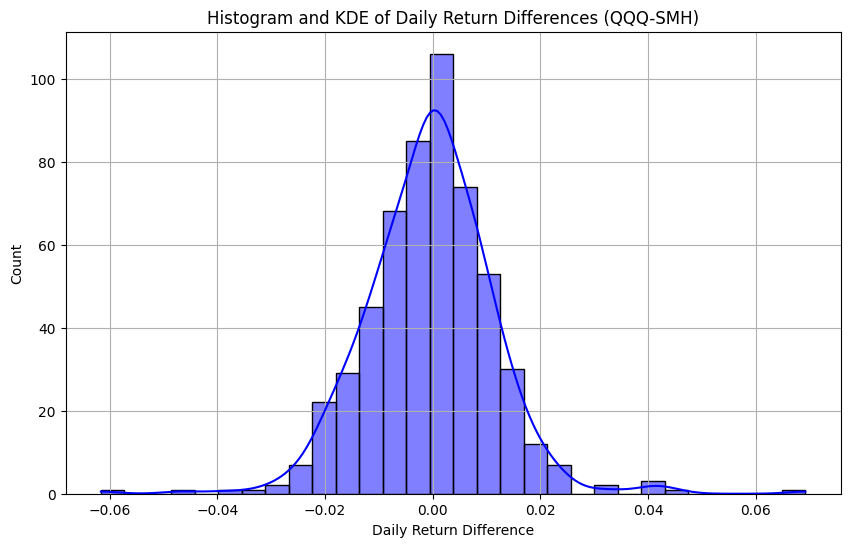

In [239]:
# graph daily return differences
plt.figure(figsize=(10, 6))
sns.histplot(diff, kde=True, bins=30, color='blue')
plt.title('Histogram and KDE of Daily Return Differences (QQQ-SMH)')
plt.xlabel('Daily Return Difference')
plt.grid(True)
plt.show()

In [ ]:
# calculate lag-1 autocorrelations
lag1_qqq = returns['QQQ'].autocorr(lag=1)
lag1_smh = returns['SMH'].autocorr(lag=1)
print(f" QQQ Autocrrelation: {lag1_qqq:.4f}")
print(f" SMH Autocorrelation: {lag1_smh:.4f}")

-0.0045
-0.0423


In [ ]:
#calculate pearson correlation
correlation = returns['QQQ'].corr(returns['SMH'])
print(f"Correlation: {correlation:.4f}")

0.8666


In [242]:
#perform paired t-test
t_statistic, p_value = stats.ttest_1samp(diff, popmean=0)
print(f"Paired t-test statistic: {t_statistic:.4f}")
print(f"Paired t-test p-value: {p_value:.4f}")

Paired t-test statistic: -1.0411
Paired t-test p-value: 0.2983


In [243]:
# paired t-test with beta-adjusted returns below this

In [244]:
# get beta for QQQ 
cov_qqq_spy = np.cov(returns['QQQ'], returns['SPY'])[0][1]
var_spy = np.var(returns['SPY'])
beta_qqq = cov_qqq_spy / var_spy

# beta for SMH
cov_smh_spy = np.cov(returns['SMH'], returns['SPY'])[0][1]
beta_smh = cov_smh_spy / var_spy

print(f"QQQ Beta: {beta_qqq:.4f}")
print(f"SMH Beta: {beta_smh:.4f}")

QQQ Beta: 1.3067
SMH Beta: 1.8947


In [245]:
# calculating adjusted returns
qqq_adj_returns = returns['QQQ'] / beta_qqq
smh_adj_returns = returns['SMH'] / beta_smh
diff_adj = qqq_adj_returns - smh_adj_returns

In [246]:
# calculate lag1-autocorrelations for beta-adjusted returns
lag1_qqq_adj_returns = qqq_adj_returns.autocorr(lag=1)
lag1_smh_adj_returns = smh_adj_returns.autocorr(lag=1)
print(f" Autocorrelations for QQQ: {lag1_qqq_adj_returns:.4f}")
print(f" Autocorrelation for SMH: {lag1_smh_adj_returns:.4f}")

 Autocorrelations for QQQ: -0.0045
 Autocorrelation for SMH: -0.0423


In [247]:
# paired t test for beta-adjusted returns
t_statistic_adj, p_value_adj = stats.ttest_1samp(diff_adj, popmean=0)

print(f"Beta-adjusted paired t test statistic: {t_statistic_adj:.4f}")
print(f"Beta-adjusted paired t test p-value: {p_value_adj:.4f}")

Beta-adjusted paired t test statistic: -0.0153
Beta-adjusted paired t test p-value: 0.9878
